## Caracteres compuestos
### Con dominancia
Imagina que en una población concreta un gen implicado en el desarrollo del antebrazo presenta dos alelos: uno dominante **A**, que determina un antebrazo de 28 cm, y uno recesivo **a** que en homocigosis determina un antebrazo de 25 cm. Además, en la población existe otro gen polimórfico con dos alelos que afecta la longitud del húmero, con un alelo dominante **B** que determina un húmero de 32 cm y un alelo recesivo **b**, que determina un húmero de 29 cm. En la población existen, por tanto, cuatro longitudes posibles del brazo, desde el hombro hasta la muñeca:

| Genotipo | Longitud total |
| -------- | -------------- |
|  A- B-   |  28 + 33 = 61  |
|  A- bb   |  28 + 29 = 57  |
|  aa B-   |  25 + 33 = 58  |
|  aa bb   |  25 + 29 = 54  |

El bloque siguiente ejecuta una simulación de un cruce entre dos dobles hetercigotos, con una descendencia de 2000 individuos, en la que se pueden apreciar las proporciones Mendelianas de un cruce dihíbrido típico, 9:3:3:1.
 

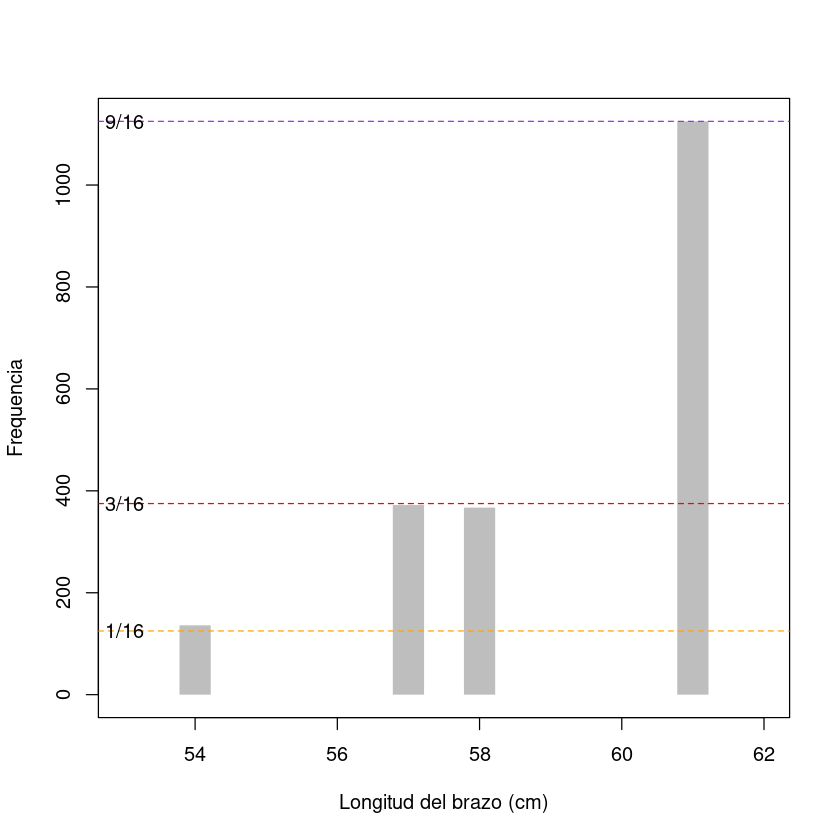

In [6]:
system2('quantinemo', args = 'dihibrid/cross.ini')
arm_lengths <- read.table('results/sim_g2.gen', skip = 2)$V2
arm_table   <- table(arm_lengths)
plot(c(53, 62), c(0, max(c(1125, table(arm_lengths)))),
     type = 'n', xlab = 'Longitud del brazo (cm)', ylab = 'Frequencia')
lines(as.numeric(names(arm_table)), arm_table, type='h', lwd=25, lend=1, col='gray')
abline(h=2000*c(1,3,9)/16, lty=2, col=c('orange','red','purple'))
text(x = 53, y = 2000 * c(1,3,9)/16, labels = c('1/16', '3/16', '9/16'))

La longitud total del brazo sería un carácter compuesto por dos caracteres subyacentes, cada uno determinado por un único gen (en esta población, donde otros genes potencialmente implicados son *monomórficos*). Midiendo el brazo entero, todavía podemos apreciar proporciones Mendelianas de un cruce dihíbrido (9:3:3:1), porque los dos genes tienen dominancia, porque no hay epistasia y porque al parecer el ambiente es tan homogéneo en esta población hipotética, que no afecta en absoluto a las diferencias de longitud del brazo entre indivíduos. Es decir, aunque el ambiente (por ejemplo, la alimentación) podría influir en el carácter, estamos asumiendo que todos los individuos se desarrollan en el mismo ambiente.

### Sin dominancia
¿Qué pasaría si en lugar de dominancia existiera una herencia intermedia? Esto lo podemos comprobar ejecutando el bloque siguiente.

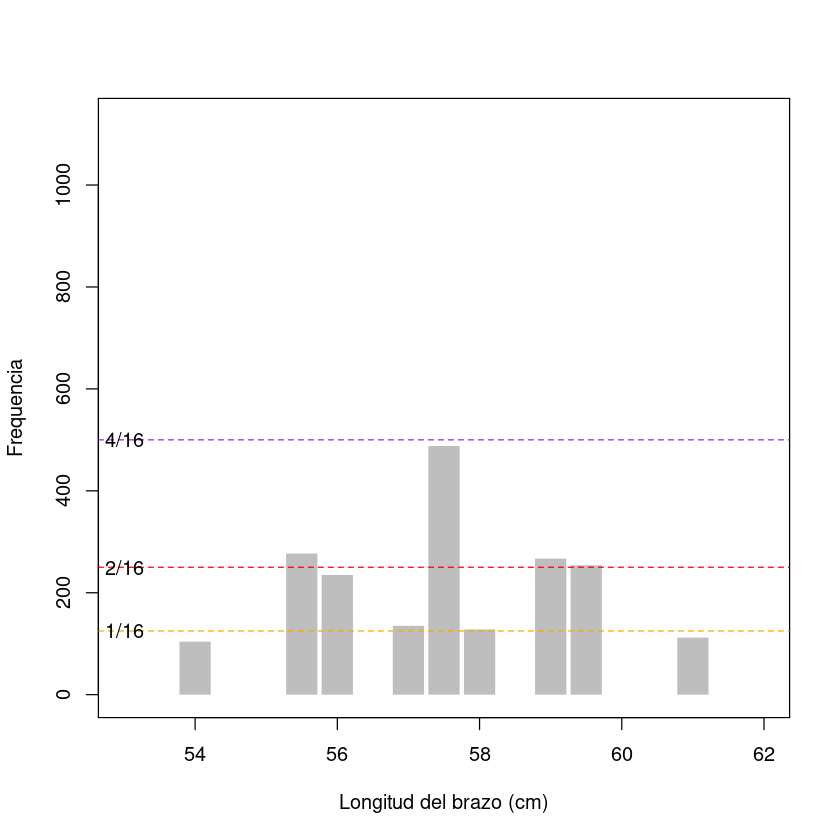

In [8]:
system2('quantinemo', args = 'dihibrid/SinDominancia.ini')
arm_lengths <- read.table('results/SinDom_g2.gen', skip = 2)$V2
arm_table   <- table(arm_lengths)
plot(c(53, 62), c(0, max(c(1125, table(arm_lengths)))),
     type = 'n', xlab = 'Longitud del brazo (cm)', ylab = 'Frequencia')
lines(as.numeric(names(arm_table)), arm_table, type='h', lwd=25, lend=1, col='gray')
abline(h=2000*c(1,2,4)/16, lty=2, col=c('orange','red','purple'))
text(x = 53, y = 2000 * c(1,2,4)/16, labels = c('1/16', '2/16', '4/16'))

Ahora, aunque el carácter "longitud del brazo" está determinado en esta familia de 2000 hermanos por sólo dos genes, ahora aparecen 9 clases fenotípicas, en proporciones 4:2:2:2:2:1:1:1:1, es decir, nada que podamos reconocer fácilmente como "herencia Mendeliana". Y sin embargo, lo que sucede es una consecuencia directa de la genética Mendeliana, cuando no hay dominancia (sino herencia intermedia) y cuando el carácter está determinado **aditivamente** por dos genes (sin epistasia entre ellos). La tabla siguiente muestra las frecuencias esperadas de cada genotipo y sus fenotipos correspondientes.

| Frecuencia | Genotipo | Antebrazo (cm) | Húmero (cm) | Total (cm) |
| ---------- | -------- | -------------- | ----------- | ---------- |
|    1/16    |  AA BB   |      28.0      |     33.0    |     61.0   |
|    2/16    |  AA Bb   |      28.0      |     31.0    |     59.0   |
|    1/16    |  AA bb   |      28.0      |     29.0    |     57.0   |
|    2/16    |  Aa BB   |      26.5      |     33.0    |     59.5   |
|    4/16    |  Aa Bb   |      26.5      |     31.0    |     57.5   |
|    2/16    |  Aa bb   |      26.5      |     29.0    |     55.5   |
|    1/16    |  aa BB   |      25.0      |     33.0    |     58.0   |
|    2/16    |  aa Bb   |      25.0      |     31.0    |     56.0   |
|    1/16    |  aa bb   |      25.0      |     29.0    |     54.0   |

### Con variancia ambiental
Ahora bien, si las pequeñas (o no) diferencias en el ambiente que experimentan los individuos contribuye a las diferencias en la longitud del brazo, podría ser imposible clasificar a los indivíduos en las clases genotípicas a las que pertenecen, porque el carácter se distribuiría de forma más *contínua*, tomando cualquier valor intermedio entre los **valores genotípicos**. Esto podemos comprobarlo ejecutando una nueva simulación, en el bloque siguiente, donde tampoco hay dominancia.

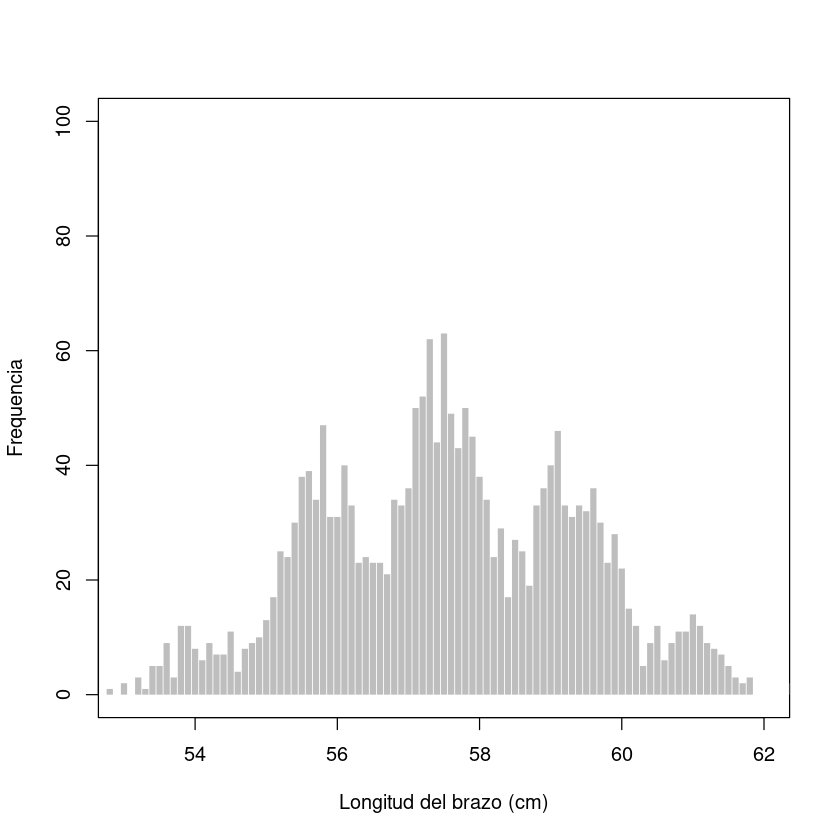

In [26]:
system2('quantinemo', args = 'dihibrid/ConAmbiente.ini')
arm_lengths <- round(read.table('results/ConAmb_g2.phe', skip = 2)$V2, 1)
arm_table   <- table(arm_lengths)
plot(c(53, 62), c(0, 100),
     type = 'n', xlab = 'Longitud del brazo (cm)', ylab = 'Frequencia')
lines(as.numeric(names(arm_table)), arm_table, type='h', lwd=5, lend=1, col='gray')

No es difícil imaginar que algunos caracteres como la altura o como pigmentación puedan estar determinados por la acción conjunta y aditiva de varios genes. En el ejemplo siguiente, se reproduce el experimento de Nilson-Ehle con trigo.

## Nilsson-Ehle

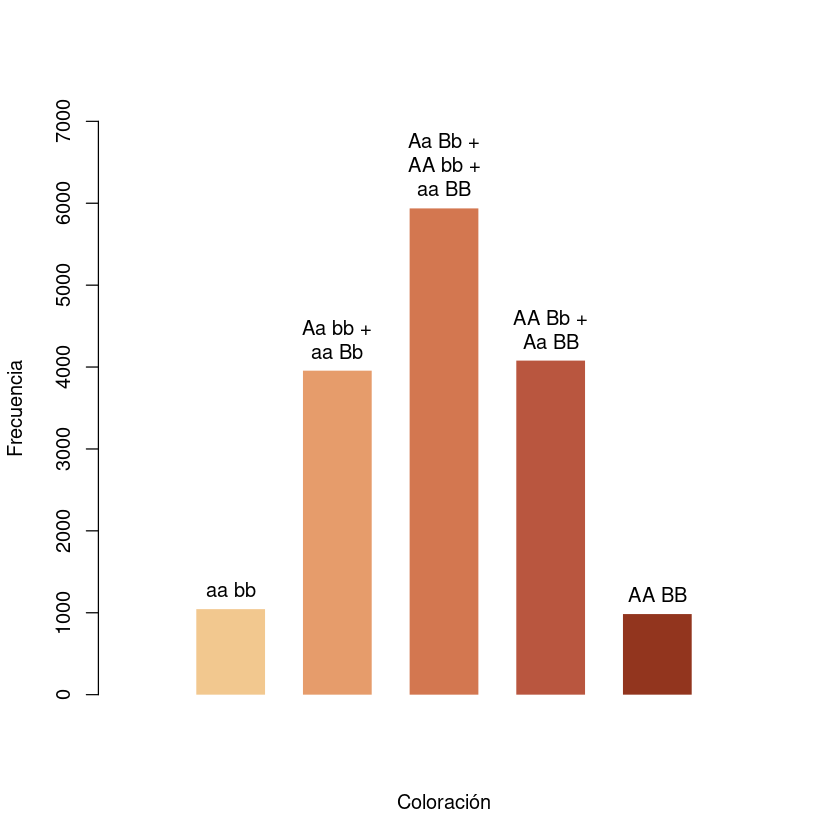

In [32]:
library('MetBrewer')
system2('quantinemo', args = 'Nilsson-Ehle/NE2G.ini')
coloracion <- read.table('results/NE2G_g2.gen', skip = 2)$V2
col_tabla  <- table(coloracion)
plot(c(-0.5, 2.5), c(0,7000), type = 'n', axes = FALSE, xlab = 'Coloración', ylab = 'Frecuencia')
axis(2)
lines(as.numeric(names(col_tabla)), col_tabla, type = 'h', lend = 1,
      col = met.brewer('OKeeffe2', 5), lwd = 55)
text(as.numeric(names(col_tabla)), col_tabla, pos = 3,
     labels = c('aa bb', 'Aa bb +\naa Bb', 'Aa Bb +\nAA bb +\naa BB', 'AA Bb +\nAa BB', 'AA BB'))